In [54]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

## Разделение по файлам

In [55]:
X = pd.read_csv("../data/X.csv")

In [56]:
X.head()

,engine_id,aircraft_id,flight_datetime,flight_phase,engine_position,n1_modifier,number_blades,engine_family,engine_type,manufacturer,...,ZT1A,ZVIAS,ZWBP1,ZWBP1_8E,ZWBP2,ZWBP2_8E,ZXM,IBE,IBP,IAIE
0,14aa1250a60229a6f0fc62e973fe757d076f897e4bc93a...,adb019dcde61d092941e0fec4e89b405130df238877e26...,2022-02-08 03:50:15,TAKEOFF,1,6.0,36.0,CFM56-5B,CFM56-5B4,CFM INTERNATIONAL,...,-2.90,NaN,1.168449,NaN,1.190495,NaN,0.2470,1.0,NaN,1.0
1,6dc714d821a73d97c06143281b622c4e45c791985425c8...,31baf613cc66c483d5576812d060e54d64275325be437f...,2022-07-24 02:46:01,CRUISE,2,0.0,28.0,CF34-8E,CF34-8E5,GE AIRCRAFT ENGINES,...,-21.10,261.299988,NaN,28.8281,NaN,26.4062,0.7110,1.0,1.0,0.0
2,dda2a4e5f8b7c39356d9da1279e61b44bf4362c6cf46a0...,47ea147feec375157fdc4ef94bce6803be3f847399e52a...,2022-05-31 22:40:14,TAKEOFF,2,6.0,36.0,CFM56-5B,CFM56-5B4,CFM INTERNATIONAL,...,17.50,NaN,0.088185,NaN,0.088185,NaN,0.2420,0.0,NaN,0.0
3,f5a5af90e581be9a4b812c1000c5a9fa938741889bab62...,30c6570a99d5554ca6975f2ca386e7d3af1b3b92dc063e...,2022-05-25 23:50:56,CRUISE,2,5.0,36.0,CFM56-5B,CFM56-5B4,CFM INTERNATIONAL,...,-15.40,NaN,0.925940,NaN,0.925940,NaN,0.7690,1.0,NaN,NaN
4,364a94e57c5e7705c650bdadda955186d3a8f9d96a3d9e...,86b6b690d8ede50869aa2562b655a65abd786d169572b4...,2022-06-29 22:08:24,CRUISE,1,4.0,24.0,CFM56-7,CFM56-7B27/B1,CFM INTERNATIONAL,...,-20.75,NaN,NaN,NaN,NaN,NaN,0.7807,1.0,1.0,NaN


In [59]:
y = pd.read_csv("../data/y.csv")

In [60]:
y.head()

,flight_datetime,flight_phase,engine_id,BRAT,DEGT,DELFN,DELN1,DELVSV,DPOIL,EGTC,...,SLOATL_D,VSVNOM,WBE,WBI,WFMP,ZPCN25_D,ZT49_D,ZTLA_D,ZTNAC_D,ZWF36_D
0,2022-02-08 03:50:15,TAKEOFF,14aa1250a60229a6f0fc62e973fe757d076f897e4bc93a...,0.920896,NaN,18.760359,6.457291,NaN,NaN,NaN,...,0.81176,NaN,1.16845,NaN,NaN,0.050003,-2.000000,NaN,NaN,NaN
1,2022-07-24 02:46:01,CRUISE,6dc714d821a73d97c06143281b622c4e45c791985425c8...,1.000000,24.116821,NaN,NaN,NaN,NaN,684.758179,...,NaN,NaN,NaN,0.000000,1648.92749,0.125000,8.062500,0.03125,NaN,9.375000
2,2022-05-31 22:40:14,TAKEOFF,dda2a4e5f8b7c39356d9da1279e61b44bf4362c6cf46a0...,0.000000,NaN,21.471327,7.321465,NaN,NaN,NaN,...,3.35881,NaN,NaN,NaN,NaN,-0.050003,-9.000000,NaN,NaN,NaN
3,2022-05-25 23:50:56,CRUISE,f5a5af90e581be9a4b812c1000c5a9fa938741889bab62...,0.893764,-16.211914,NaN,NaN,1.7,-23.360001,677.211914,...,NaN,0.0,0.92594,-0.106236,2843.62402,-0.099998,3.799988,NaN,-16.5,-5.511719
4,2022-06-29 22:08:24,CRUISE,364a94e57c5e7705c650bdadda955186d3a8f9d96a3d9e...,1.000000,25.960205,NaN,NaN,NaN,-15.086960,648.039795,...,NaN,NaN,NaN,1.000000,2659.71655,-0.029999,5.000000,NaN,NaN,-35.650146


In [62]:
df_merged = pd.merge(X, y, how="inner", on=["engine_id", "flight_datetime", "flight_phase"])

In [63]:
#разделение на takeoff и cruise

takeoff_df = df_merged[df_merged["flight_phase"] == "TAKEOFF"]
cruise_df = df_merged[df_merged["flight_phase"] == "CRUISE"]

Число типов двигателей

In [47]:
df_merged["engine_type"].value_counts()

engine_type
CF34-8E5         36674
CFM56-7B26       26236
CFM56-5B4        20742
CFM56-5B3         8134
CFM56-7B27/B1     3802
Name: count, dtype: int64

In [48]:
engine_types = ["CF34-8E5", "CFM56-7B26", "CFM56-5B4", "CFM56-5B3", "CFM56-7B27/B1"]

In [49]:
takeoff_df_engines = []
cruise_df_engines = []

for en in engine_types:
    buf = takeoff_df[takeoff_df["engine_type"] == en]
    buf = buf.drop(["flight_phase", "engine_type"], axis = 1)
    takeoff_df_engines.append(buf)
    if '/' in en:
        buf.to_csv("../data/takeoff_" + "CFM56-7B27-B1" + ".csv",index=False)
    else:
        buf.to_csv("../data/takeoff_" + en + ".csv",index=False)
    
    buf = cruise_df[cruise_df["engine_type"] == en]
    buf = buf.drop(["flight_phase", "engine_type"], axis = 1)
    cruise_df_engines.append(buf)
    if '/' in en:
        buf.to_csv("../data/cruise_" + "CFM56-7B27-B1" + ".csv",index=False)
    else:
        buf.to_csv("../data/cruise_" + en + ".csv",index=False)

## Целевые переменные

In [12]:
y = pd.read_csv("../data/y.csv")
targets = y.columns.to_list()
tr = ["engine_id", "flight_datetime", "flight_phase"]
for t in tr:
    targets.remove(t)

## Очистка данных

In [33]:
df = pd.read_csv("../data/takeoff_CF34-8E5.csv")

In [34]:
X = pd.read_csv("../data/X.csv")
X.columns.to_list()

['engine_id',
 'aircraft_id',
 'flight_datetime',
 'flight_phase',
 'engine_position',
 'n1_modifier',
 'number_blades',
 'engine_family',
 'engine_type',
 'manufacturer',
 'ZHPTAC',
 'ZLPTAC',
 'ZPCN12',
 'ZPCN25',
 'ZPHSF',
 'ZPHSR',
 'ZPN12R',
 'ZPOIL',
 'ZPS3',
 'ZT1AB',
 'ZT3',
 'ZT49',
 'ZTAMB',
 'ZTLA',
 'ZTNAC',
 'ZTOIL',
 'ZVB1F',
 'ZVB1R',
 'ZVB2F',
 'ZVB2R',
 'ZVSV',
 'ZWF36',
 'IHPSOV',
 'aircraft_family',
 'aircraft_type',
 'aircraft_grp',
 'ac_manufacturer',
 'AGW',
 'CAS',
 'IAI',
 'IVS12',
 'SAT',
 'ZALT',
 'ZT1A',
 'ZVIAS',
 'ZWBP1',
 'ZWBP1_8E',
 'ZWBP2',
 'ZWBP2_8E',
 'ZXM',
 'IBE',
 'IBP',
 'IAIE']

In [35]:
df = df.drop(["aircraft_id"], axis = 1)
df = df.fillna(0)

to_categorical = ['number_blades', 'engine_position', 'engine_family', 
                  'manufacturer', 'aircraft_family', 'aircraft_type', 'aircraft_grp',
                  'ac_manufacturer', 'flight_datetime']

for cl in to_categorical:
    df[cl] = df[cl].astype(object)

In [36]:
numerical = list(set(df.columns.to_list()) - set(to_categorical))

In [37]:
df.shape

(18564, 80)

In [38]:
#выбросы
def out_std(s, nstd=3.0):
    data_mean, data_std = s.mean(), s.std()
    cut_off = data_std * nstd
    lower, upper = data_mean - cut_off, data_mean + cut_off
    return [True if x < lower or x > upper else False for x in s]
    
def out_iqr(s, k=1.5):
    q25, q75 = np.percentile(s, 25), np.percentile(s, 75)
    iqr = q75 - q25
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    return [True if x < lower or x > upper else False for x in s]

In [39]:
for cl in numerical:
    mask = out_std(df[cl], nstd = 2.0)
    print(cl, sum(df[cl][mask]))

ZHPTAC 0
ZVB1F 917.5748779399987
WBE 0
IHPSOV 0
WFMP 0
CAS 0
IVS12 0
ZT3 332899.0391840019
ZVB2R 1734.7413638524995
IAIE 1766.0
GPCN25 0
ZXM 201.5000006779994
WBI 0
ZTLA_D 0
IBP 0.0
SAT 0
ZPCN25 76826.45145150038
ZTLA 51981.730135200254
ZT49 684500.0
PCN1BR 0
ZVB1R 0
ZPN12R 75533.45203950038
ZPS3 212829.01523600076
ZTNAC_D 0
ZT1A -13319.8000292
EGTHDM 22151.56201896601
VSVNOM 0
SLOATL_D 2.4730000016681686e-05
ZPHSR 0
DEGT 0
DELVSV 0
ZPCN25_D -6.867000000254642e-05
ZPHSF 0
SLOATL 15589.155536099997


TypeError: Could not convert 17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b765c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b766dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90531627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e805c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5005c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7660958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c486dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc615c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b765c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc616dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7617347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b761627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c574e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d630a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7debf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7674e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7debf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f199a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4844e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90531627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c544e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5005c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7617347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7636b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c485c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4874e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4883dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd45c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a596dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d946dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7664d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2efa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c485c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7660958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c51aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb7527683dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e805c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c486dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7617347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4860958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a59ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f195c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4874e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f196dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefa5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a574e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f36dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c036dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7674e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d940a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac416dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac415c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a595c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7674e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f195c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c59a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c544e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb75276e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c036dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90531aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb75276fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac415c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb7527664d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e805c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b766dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d630a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279ba5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4817347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90535c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc616dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e806dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7617347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c588a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4860958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7617347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb75276b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c560958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7debf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb752768c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf5e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bbb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c485e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bbb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4836b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d630a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f199a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c56dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7ded30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d36dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90531aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90531627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c564d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b766dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a59a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c485c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a59ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90536dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7674e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2efa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a595c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c588a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c485c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a596dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd46dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f196dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feeffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb752766dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c5e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac410a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b761627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f191627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4836b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279ba5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4874e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c486dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4874e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4883dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c544e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4874e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc615c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5005e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c50a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a544e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a50a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7617347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b765c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f191aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc615c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c50a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c59ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7defa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90531aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4860958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b761627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c52813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a564d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a591aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c036dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a56dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c56dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a595e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279ba5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a560958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f191627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d630a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfa5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c035c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7660958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a591627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d632d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c50a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e806dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c574e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4860958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d630a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279ba5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd45c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a59a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c51627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c59a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd46dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c51aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c588a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4864d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc615c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5005c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd46dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb752761627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b761aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c485c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac416dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac410a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd45c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4883dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7debf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90531627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4883dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd45c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d940a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7674e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d940a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7688a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a564d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb752769ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c51627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608245c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c56dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd45c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4844e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a544e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4864d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c544e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd46dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7688a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d636dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e806dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c485c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90531aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a591627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7660958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608245c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c560958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e806dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfa5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7617347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7defa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5006dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c486dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4883dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd46dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4844e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac410a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d632d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4883dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90535c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d946dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90536dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7664d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90535c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c55c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90535c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e806dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4860958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4860958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c544e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c544e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f191627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac416dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a591aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a560958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7683dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb75276e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f199ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a544e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5006dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5005e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d940a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d940a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefa5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c036dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bbbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c564d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b765c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a596dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc615c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c564d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a595e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4844e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7617347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90531aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a50a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f195e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f199ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4844e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f196dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd45c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5005c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a59ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4817347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b761627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c564d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c544e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7664d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7defa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb752769a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90531aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90531aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd46dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4817347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608245c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608245c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a50a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4864d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c036dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90535c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608246dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb752766dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d940a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90531aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d630a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b761aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d630a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7636b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4836b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb7527683dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a55c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c59a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4888a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4836b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608246dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4836b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f191aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a59a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7674e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90535c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4883dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4817347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac415c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4883dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d940a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c588a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4860958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7defa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4874e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac416dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90535c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c035c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7617347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b766dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5006dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac416dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a588a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d632d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7683dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b5e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4817347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c035c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7617347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f196dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d636dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f36dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7617347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f199a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd45e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bbb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c485c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c55c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4864d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f191aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc615c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d630a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c564d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c59ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a591627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c55c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7debf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4888a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c035c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c036dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feeffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4844e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7664d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aefa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4817347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b766dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a560958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c588a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c574e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4817347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a544e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c52813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc615c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd46dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a55c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a595c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac416dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefa5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a588a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a56dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a564d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d940a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a544e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c55e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bbe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a596dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4883dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd45c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c51627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c59ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bbb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c574e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2efa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc615c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608245c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4883dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7617347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4883dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfa5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7ded30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4874e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d945c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5006dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4836b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a59a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac410a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7defa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90531aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c485c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a59a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a55c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608246dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90531627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7688a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a55c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb7527683dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c51627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a591aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7debf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c574e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f191627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f196dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d630a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f195c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac415c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f195c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd45c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac415c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac410a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c564d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608245c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac415c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd45c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5005c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d940a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4883dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5005c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aefa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c52813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c55c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4844e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4817347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7688a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f195c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2efa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608245c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a564d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90536dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb752761aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c588a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c560958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb752765c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7617347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a596dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90536dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb75276fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608245c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4860958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac410a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd45c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90536dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aefa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c56dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2efa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7debf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c486dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c560958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f195c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c50a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d946dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a560958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279ba5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b761aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aefa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b761aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d636dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d36dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feeffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c036dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2efa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7617347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a59ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac415c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c55c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f191aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d946dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f191aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c56dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e806dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4888a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f36dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d36dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c035c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4883dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7defa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7664d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7ded30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c59ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c486dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc616dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac410a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4817347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7617347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b765e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5005e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a544e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c55c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd45c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c50a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90536dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c59a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2efa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d36dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfa5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfa5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2efa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d36dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b766dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c560958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac410a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a56dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aefa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a591aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b761aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc616dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7defa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608245c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7664d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c59a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f195c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4860958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c574e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac410a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e805c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c485c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7664d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4883dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c55c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5005c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2efa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f199a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4888a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279ba5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c560958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d946dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4844e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a56dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b761627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90531aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f191627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7660958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f195c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5005c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4844e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7664d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac415c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7664d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c59ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c560958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4864d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7688a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d630a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90535e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bbbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c51627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a595c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e805c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f36dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c485c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608245c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac410a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7617347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7688a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4844e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac410a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c560958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7660958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a595e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4888a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7683dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac415c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb752768731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7660958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac416dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aefa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f199ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4874e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608246dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7660958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a595c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac416dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a56dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac416dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feeffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279ba5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7debf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b761627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f196dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7debf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a588a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c51aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a564d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c574e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d946dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c035c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd45c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc615c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c560958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7660958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7664d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4883dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a595c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5006dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c485c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd45e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb7527617347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f199ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c564d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c59a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c51627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4883dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7636b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c486dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb7527660958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7674e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608245c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a564d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c56dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7674e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c485c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c574e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc616dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a591aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f191aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608245c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c564d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d940a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b766dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d940a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d940a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b766dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d630a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d630a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4844e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279ba5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a564d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f191aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d946dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc615c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d636dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7688a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c564d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c59a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d632813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f36dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4844e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feeffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a50a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f199ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aefa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90535e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bbed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb752761aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5006dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feeffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90535c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a56dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7ded30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a59ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7ded30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d630a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b761aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7debf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aefa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb752766dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7664d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac416dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4836b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfa5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c5e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c485c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f195c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c564d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4817347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7664d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4888a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7660958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c564d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfa5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a588a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feeffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b765c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feeffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90536dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c486dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4844e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f191aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c486dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d940a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4860958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aefa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e806dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7617347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a596dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4888a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a56dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d636dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4817347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608246dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c560958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c574e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7defa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7683dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7636b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5005c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a574e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d940a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c51aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d945c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4864d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7defa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d946dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d940a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7ded30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c56dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feeffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a59a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f196dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefa5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608245c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d630a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c544e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a55c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5006dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd45c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608246dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c035c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a55c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef5e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a591627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7660958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4874e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d946dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c51aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfa5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a544e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a596dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b766dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d632d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a56dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d632813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c560958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7688a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a591aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90536dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d945c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a574e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d632d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4888a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d35e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7defa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f195c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a595c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7debf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a564d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7debf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608246dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aefa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c51627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7674e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f36dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4844e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc615c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90531aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d946dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7ded30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bbe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a59ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c56dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c51627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e805c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d630a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a560958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c5e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7683dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7636b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d632813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608246dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a50a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4860958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b761627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd46dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefa5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b766dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a596dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f191627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4864d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7674e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f191627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b766dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c51aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac415c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac415c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb75276904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7636b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5005c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd46dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c564d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc616dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279ba5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d35e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b765c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4864d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c55c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4817347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59995e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5006dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2efa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7660958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90531aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f199a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7debf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c035c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d632d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f191aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4860958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4860958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a55c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2efa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b765c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d632813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac410a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c486dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aefa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc616dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feeffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aefa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb7527617347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd45c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90535c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7debf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2efa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4860958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279ba5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc615c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5006dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7664d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7ded30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f199a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7674e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfa5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a59ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c59ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b765c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279ba5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d940a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b765c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a588a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e805c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c036dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd45c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279ba5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a544e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac415c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c544e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279ba5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb752768731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a55c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac416dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefa5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c036dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d630a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7688a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4888a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279ba5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c485c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d632d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7636b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608246dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4836b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4817347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c564d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c544e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d636dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac410a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c485c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d945c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608246dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90536dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4860958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c560958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c035c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c036dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b765c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4874e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c036dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a59a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c59a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac410a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90535c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a591627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4888a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f195c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a55c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f199ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac410a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c56dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4864d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90531aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d630a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a588a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c564d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c485c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d946dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a591aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b761aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7617347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7636b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4864d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd45c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5005c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7636b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4874e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608245e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f199ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c574e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7688a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4874e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c588a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc615c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c544e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4836b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90535c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608246dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b765c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb752761aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfa5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d36dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7660958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb7527683dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd45c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c035c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb7527644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d945c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d636dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7664d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc616dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c544e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac415c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5006dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c55c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90531627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f195e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5006dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90535c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a560958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d946dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7660958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e805c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a591627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a596dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aefa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e805c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d630a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a55c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7683dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90536dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b765c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7664d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e806dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc616dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7defa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aefa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4860958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d632d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f191627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4836b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb752768bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d36dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a591aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2efa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c544e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4888a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c51aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4883dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b761aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4888a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7defa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608245c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7ded30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a50a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f191aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b765c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a59a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7617347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b761aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb75276ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4888a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c485c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a588a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f191627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f195c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279ba5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b761627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a59ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb75276ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7defa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c59ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d636dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d630a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aefa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c52813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c52813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7636b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c486dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7ded30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c486dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feeffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac416dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90531aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c486dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c51aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a55c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e805c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7674e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a55c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a55e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a55e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc615c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90536dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7664d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c035c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f36dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a564d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c485c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f195c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aefa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a595c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d630a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac410a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c59a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d36dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a591627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f199a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7683dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb75276b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c560958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4860958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279ba5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d946dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b761aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7688a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90531627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f196dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a595c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4836b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279ba5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a544e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f191627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d636dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a591aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f196dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c486dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f199a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c56dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7ded30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d940a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2efa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d636dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c035c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5005c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7617347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b761627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a595e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bbe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b761627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4836b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c574e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a59a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c59a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f191aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7660958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c574e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a56dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4817347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfa5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f191aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90535c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd45c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7683dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a59ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4844e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d632d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7688a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c59a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe05e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7688a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b761aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d36dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c51aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc616dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a564d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c035c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90536dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b761aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90535c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f191627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f191627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4864d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7debf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd46dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90535c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5005c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7664d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e805c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb7527636b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4874e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5006dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a560958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f199a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c564d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d946dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aefa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c588a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d632d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c036dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f36dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac410a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d630a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a560958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e805e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90535c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c52813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4844e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7664d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c544e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d940a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b761627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c51627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90531627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c486dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4874e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d946dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f199a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc615c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c59a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7664d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d630a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a544e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd46dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7ded30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4860958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7664d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d636dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c035e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bbd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac415c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e805c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de5e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bbe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c52813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279ba5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4817347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b761627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d630a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac415c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b765c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc615e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90531aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7636b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f199ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b761aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b766dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90531627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f199a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7674e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7defa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c51aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5005c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c51aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7617347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f191627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f191627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f199a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90531627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c485c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb75276d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4883dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90536dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feeffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7defa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4844e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa05e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc615c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f36dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a59ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7debf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac410a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f199a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4860958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c588a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608246dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a564d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279ba5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7688a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c544e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f199a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b766dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b765e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d946dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feeffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefa5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a59a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7688a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d945c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7617347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4817347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7674e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a560958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de5e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b766dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c588a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a595c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c035c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5006dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d36dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4874e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f191aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f195c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7660958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c574e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90531627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb75276e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d632d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f36dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a591627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c574e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c588a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a50a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c035c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4844e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5005c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d36dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac415c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7617347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c50a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb75276ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2efa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f36dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c55e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c560958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4817347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7674e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f196dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4817347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e805c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7617347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7683dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4864d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d940a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac410a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f36dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d632813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc616dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d940a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4817347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac416dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c035c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a59a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4883dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c55e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bbb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2efa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac415c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d632d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7688a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f199ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608246dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d636dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7debf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d945c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d632813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7688a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d940a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a596dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb75276b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c485c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7674e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a574e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd45c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d632813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7683dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4883dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a544e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4864d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4883dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4860958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7ded30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd46dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a595c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7674e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb75276d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d636dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d630a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb752769ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7defa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc615c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb75276fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c544e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a596dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac410a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7ded30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c036dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc616dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefa5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d946dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c55c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7674e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc615c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90536dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5006dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b765c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aefa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608246dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b766dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a59a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4864d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4883dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd46dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7ded30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d632d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a595c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f195c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c56dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefa5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c485c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608241aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d636dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a50a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c036dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d632d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7ded30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7688a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7660958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a560958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4883dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7660958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd45c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4860958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7636b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b765c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a574e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac411627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb752761627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a50a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a55c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb7527664d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279ba5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd46dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4883dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac416dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a595c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4883dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b766dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e806dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefa5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c5e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bba5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279ba5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7683dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfa5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac410a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c486dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c035c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb75276e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c59ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7688a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b766dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aefa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608245c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7defa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c560958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4844e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc615c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90536dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f191aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c036dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feeffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608246dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac416dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f199a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b765c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7688a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feeffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d945c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c51aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5006dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feeffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b766dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c544e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac416dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d630a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7617347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc616dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac415c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4874e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4844e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d636dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c560958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a588a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c52813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc615c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c574e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac416dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac416dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c486dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a591aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d36dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b761aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4888a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d946dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c50a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7defa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b765c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f199ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7debf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc616dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b5e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4864d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f199a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac410a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7688a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a560958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aefa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aefa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4864d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb752769a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a59ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7ded30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90535c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d630a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a56dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfa5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e805c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7664d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a596dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7674e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d940a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac410a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7664d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5005c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfa5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2efa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f195c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a50a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5005c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c55c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7664d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7debf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7683dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e806dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a56dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfa5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a59a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ebf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c564d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c574e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7617347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608245c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4836b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7636b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d632d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ce8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb752765c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5005c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a596dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac416dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb7527617347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4888a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c56dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a59a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a591627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d632813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a595c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c574e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d940a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4883dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7644e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7664d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7664d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608245c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b766dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4864d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc615e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bbb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4817347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7683dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5006dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4874e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f199a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c574e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d632813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a59ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7688a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd46dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c55c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d632d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90535c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4864d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90536dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a595c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5005c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7ded30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d632813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90535c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f191627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b761627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feeffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c485c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5005c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb7527683dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2efa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4883dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c544e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a59ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c544e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4844e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac415c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7674e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d636dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a591627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c56dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac415c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aeb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c482d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d940a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7636b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc616dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7debf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac415c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc615c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a591627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608245c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac412d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6188a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a595c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5005c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c035c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bba5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5005c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c485c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5005c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4844e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4860958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feeffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc616dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac415c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7636b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c481aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d630a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd40a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5998731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7660958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4860958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7683dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4874e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7674e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac415c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc619a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4888a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a59a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e800a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac418bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a596dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4144e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f190a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f35c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f196dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c55c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4888a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608246dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7683dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7636b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d632813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfe6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a591aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c55c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a50a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a55c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90535c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50036b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c485c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7664d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a591aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a599a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4817347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e806dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d31627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d632813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc612d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefa5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ca5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a592813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3e8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb75276d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e809ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a52813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d36dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599936b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4817347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c032d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f36dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefbf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6174e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d942813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4883dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d36dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b766dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac419ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d632d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb7527683dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4874e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c55c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d630a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a55c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c56dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c52813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2efa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608245c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4817347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4883dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd48bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608240a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c58731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd417347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b761627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f191aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59995c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d36dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c035c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc616dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f192813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4844e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aefa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608249ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e806dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c035c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2ec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd46dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b06dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d945c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d941aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c486dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608248731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c038c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599964d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082436b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6388a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c517347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b769a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c51627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa08c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7688a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59998bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a596dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa017347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7688a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e802d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c480a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f198bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c0374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d945c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b00a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f31aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59992813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe08bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c030a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c52d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a596dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c583dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5999ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5009a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cfa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f32813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90536dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90539ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c536b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b5e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bbe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1cd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d630a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aee2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c489ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e8044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bfd30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d638c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59974e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9460958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279bc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b1627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279be2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe01627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d632813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b766dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd41627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1944e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c031627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa09ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dea5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e905317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7683dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd45c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5001627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f195c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5000a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a588a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd483dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7deb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4864d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d631627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5992813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d940a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aed30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d639a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d336b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a5bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b7688a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403ced163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a51aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59990a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a590a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc618c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90535c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b760a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e808bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6136b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4160958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d635c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c50064d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e805c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa01aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc59991627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f1917347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b762813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf0a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d948bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608242d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d39ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606aec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6317347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5008bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f364d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c48e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4836b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b08731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a598bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c74e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c486dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef17347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b768bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c03e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f360958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f59983dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd49ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90535c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5005c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a50a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae44e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4183dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4a5309e8aa80e39434a3581d5831133fd490ac7dac8ce95ffead76b0b4e0205a58731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7debf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc61c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f30a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe09a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e88a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403cb0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4817347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa060958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b608245e041d2c05ab8d0ae9a19c82cedb6306b1d0786a89a2cca6a92abcc26dd981bb1aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc599960958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f5996dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa02d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d946dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef2813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d38731cb5c4b82a20e9d10305dd82da733bde060eecc0c77b2ba24a4abf2781c8cc832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f38c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90538c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e9053904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b60958ab5f23535a9df5c86ad4a4425e26e7bf00387221e8d826fb598f801f599e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d3b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c486dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feeffa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b60824904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe05c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c5002d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac4117347326abdfbcd8acc523a9069dba5f770f1f65ca9b2138d4dc8d0bbccd3b76fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082488a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c5c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d63bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc611aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c488c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90530a88b8ae00eb0b817075fb953711648d5d3dd8687e57946ccff881382b6606ae36b6a71d5f4cfe3e98ff970e9040bf6b3b8b7cdb501275d04d8bb0ed38a844b0bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc610a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe0b0e42606985470f2e2d77f1ad14bdd391637cc1f5c220b6d8510e285f55a1c4888a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2e9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dec832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f36dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feefe2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c8bfd649e45c2b6d948b50e9ece01441a28f8cbe0f68849254b0019b1bfa23c039a124d266cba9143ef7685c7bc99c07b48aaa8f1822f02d7da1ec384fd14cc2eed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d9474e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94d30992e9569a65764ca6f0396d90e2e4ae497927e2aae75920d6140a0d266d6374e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d949ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7dee8dab23fe000ed9610c56924a820688fa19775e60a15a98076e72460eeb75276fa04101dab850b9846d1d0db9424bcbf0818a52508ad36a69f313cfea9b6082464d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801aa393e4300d2fec926784afb613d45cd7e2d1307f2c834fc7c0dcc6f8dc5999ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa083dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd42d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d344e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41904ef6e2228fcd5e19e0bfeebb725e197b6a1a2ff819cf637f0255b97cf1279b64d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e801627d385f689d2145daa7c859b7cb6095e7dac0420a40c4b3094e1b5b9cd3f19bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc6164d46b313edfca25be20f302932207f4d667f8e1bcae043e90c7de5cb9978e80ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa088a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c9ec214d65133ec438009db829c53562263bf8582842b5d0f4744b55b4383a7de2d1eecee1d07af92b614c41744cf604226df549b1ca451c8eed06d11b59243d383dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1ce6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a59ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa044e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac416dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef0a84df34b8e0782c223c3bef55cb85eef3f554068d2d358cd17a7fc1716cbfe074e006acacdc073defc46eb27660e2dfb7398acbb362399974dc5f8d9e508d94b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5c832c947cd95db187c9409df30eedfe7af3e91136e3012f1f0305aa3b51784f3bf23db5ac85aa359c82cb8a18b0d0ce406fc40272a9b009ee01d62a88d4cfc615c888c9071d8873444bf7b6c46f7a860929703f66a89ceee7402653e6e96c500e2cb4b992f88d20826261a20c72983b42d625bfa5c4dfb9db818dc3548d0df1c6dc714d821a73d97c06143281b622c4e45c791985425c83cf95d770d99a8feef83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd4b89b5e1fea12a0ab78c29ca87649bf2687f1558dd0e67c93036996e81d7438c5e6152348198eb72a795642a601451c96bd72ee3241ecde9acabcb0f770253a5988a5b305e53116af2f6cfca0631bf93068d643e105cd4789b0f4cc061b25403c8c97da4bc8feab053617a7323564a5bd3ea7a4c12d2ec94dcefc74dd5c2e90532813cc69b6a3813712a16a86bea9f40e037279cb36ef23209e04d5bc89f810bf83dd5ba4ee2f515b83c6f09ffd7268f0a389b6303f0bf3a721afe7e634f87dd444e8bfbc36a62fad6ace2953e30c032da88adf250d8efe36ed08e38c83f5ac41ed163ff56745c53c98f72a1f2d2b989f7472e9231378c7806d55744cb383dfa0 to numeric

In [92]:
df.shape

(4018, 80)

НЕТ ВЫБРОСОВ

### Сохранить в файлы без NaN

In [86]:
for filename in os.listdir("../data/"):
    if (".csv" in filename) and (filename != "X.csv") and (filename != "y.csv"):
        df = pd.read_csv("../data/" + filename)
        df = df.drop(["aircraft_id"], axis = 1)
        for cl in df.columns.to_list():
            if len(df[cl]) == df[cl].isna().sum():
                df = df.drop([cl], axis = 1)
        print(df.shape)
        df.to_csv("../data/" + filename, index = False)

(4018, 46)
(1900, 45)
(835, 46)
(13127, 43)
(13109, 45)
(18564, 49)
(16724, 59)
(1902, 43)
(18110, 51)
(7299, 59)


### Перевод в СИ

In [2]:
!pip install pandas==0.24.2
!pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 1.7 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [169 lines of output]
      /private/var/folders/x4/7f4hrz657630_vzq5rhyrmbw0000gp/T/pip-install-zz36ajyp/pandas_418aa0a2642142038f848e47fd94cd44/setup.py:50: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
        _CYTHON_INSTALLED = ver >= LooseVersion(min_cython_ver)
      /private/var/folders/x4/7f4hrz657630_vzq5rhyrmbw0000gp/T/pip-install-zz36ajyp/pandas_418aa0a2642142038f848e47fd94cd44/setup.py:435: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
        current_system = LooseVersion(platform.mac_ver()[0])
      /private/var/folders/x4/7f4hrz657630_vzq5rhyrmbw0000gp/T/pip-install-zz36ajyp/pandas_418aa0a2642142038f848e47fd94cd44/setup.py:436: Dep


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [71]:
import pint_pandas
from pint_pandas import PintArray, PintType

ureg = PintType.ureg

def celc(x):
    ureg = UnitRegistry()
    Q_ = ureg.Quantity
    home = Q_(x, ureg.degC)
    return home.to('degK')

def ream(x):
    ureg = UnitRegistry()
    Q_ = ureg.Quantity
    home = Q_(x, ureg.degR)
    return home.to('degK')

/Users/tainella/opt/anaconda3/lib/python3.9/site-packages/pint_pandas/pint_array.py:806: UserWarning: registration of accessor <class 'pint_pandas.pint_array.PintDataFrameAccessor'> under name 'pint' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class PintDataFrameAccessor(object):
/Users/tainella/opt/anaconda3/lib/python3.9/site-packages/pint_pandas/pint_array.py:879: UserWarning: registration of accessor <class 'pint_pandas.pint_array.PintSeriesAccessor'> under name 'pint' for type <class 'pandas.core.series.Series'> is overriding a preexisting attribute with the same name.
  class PintSeriesAccessor(object):


AttributeError: module 'pint.compat' has no attribute 'upcast_types'

In [73]:
# Из Реамюра в Кельвины


# Из Цельсия в Кельвины

# df["ZT1AB"] = df["ZT1AB"].astype('pint[degC]')
# df["ZT1AB"] = df.ZT1AB.pint.to("K")

df = df.fillna(0)

to_categorical = ['number_blades', 'engine_position', 'engine_family', 
                  'manufacturer', 'aircraft_family', 'aircraft_type', 'aircraft_grp',
                  'ac_manufacturer', 'flight_datetime']

for cl in to_categorical:
    df[cl] = df[cl].astype(object)

In [94]:
df = pd.read_csv("../data/takeoff_CF34-8E5.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18564 entries, 0 to 18563
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   engine_id        18564 non-null  object 
 1   flight_datetime  18564 non-null  object 
 2   engine_position  18564 non-null  int64  
 3   n1_modifier      18564 non-null  float64
 4   number_blades    18564 non-null  float64
 5   engine_family    18564 non-null  object 
 6   manufacturer     18564 non-null  object 
 7   ZPCN12           18564 non-null  float64
 8   ZPCN25           18564 non-null  float64
 9   ZPN12R           18564 non-null  float64
 10  ZPOIL            18564 non-null  float64
 11  ZPS3             18562 non-null  float64
 12  ZT1AB            18564 non-null  float64
 13  ZT3              18562 non-null  float64
 14  ZT49             18564 non-null  float64
 15  ZTAMB            18564 non-null  float64
 16  ZTLA             18564 non-null  float64
 17  ZTOIL       

### ПАЙПЛАЙН 

In [97]:
def preprocess_file(df):
    for cl in to_categorical:
        df[cl] = df[cl].astype(object)
    
    for cl in numerical:
        if (cl in df.columns.to_list()) and (len(df[cl]) * 2 / 3 < df[cl].isna().sum()):
            df = df.drop([cl], axis = 1)
    df = df.fillna(0)
    return df

In [98]:
df = pd.read_csv("../data/takeoff_CFM56-7B27-B1.csv")
df.info()

df = preprocess_file(df)

to_categorical = ['number_blades', 'engine_position', 'engine_family', 
                  'manufacturer', 'aircraft_family', 'aircraft_type', 'aircraft_grp',
                  'ac_manufacturer', 'flight_datetime', 'engine_id']

numerical = list(set(df.columns.to_list()) - set(to_categorical))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902 entries, 0 to 1901
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   engine_id        1902 non-null   object 
 1   flight_datetime  1902 non-null   object 
 2   engine_position  1902 non-null   int64  
 3   n1_modifier      1902 non-null   float64
 4   number_blades    1902 non-null   float64
 5   engine_family    1902 non-null   object 
 6   manufacturer     1902 non-null   object 
 7   ZPCN12           1902 non-null   float64
 8   ZPCN25           1902 non-null   float64
 9   ZT49             1902 non-null   float64
 10  ZVB1F            1902 non-null   float64
 11  ZVB1R            1902 non-null   float64
 12  ZVB2F            1902 non-null   float64
 13  ZVB2R            1902 non-null   float64
 14  aircraft_family  1902 non-null   object 
 15  aircraft_type    1902 non-null   object 
 16  aircraft_grp     1902 non-null   object 
 17  ac_manufacture

In [99]:
df['n1_modifier'].sum()

7260.0

<AxesSubplot:>

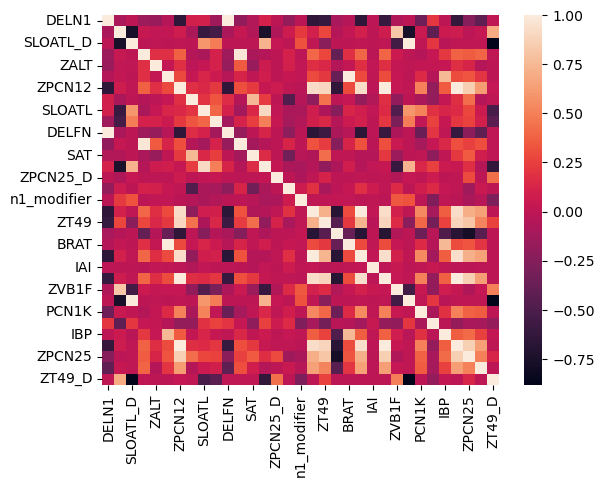

In [100]:
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

In [101]:
corr_matrix

,DELN1,ZVB1R,SLOATL_D,CAS,ZALT,IBE,ZPCN12,ZT1A,SLOATL,ZVB2R,...,PCN12,ZVB1F,EGTHDM_D,PCN1K,ZVB2F,IBP,PCN12I,ZPCN25,AGW,ZT49_D
DELN1,1.000000,-0.087898,-0.003444,-0.153187,-0.157656,-0.041653,-0.653000,0.090303,0.098282,-0.137525,...,-0.616029,-0.062174,-0.003445,-0.349151,0.212712,-0.003114,-0.622695,-0.245807,-0.414566,0.001202
ZVB1R,-0.087898,1.000000,-0.760617,0.038808,0.007838,0.021492,0.072344,-0.087634,-0.600900,-0.542844,...,0.069039,0.817136,-0.761959,0.049436,-0.412272,0.058899,0.072157,-0.012510,0.036705,0.688330
SLOATL_D,-0.003444,-0.760617,1.000000,-0.000206,0.000175,0.000032,0.002538,-0.000356,0.588756,0.486554,...,0.005000,-0.544880,0.999888,0.002774,0.210661,-0.022512,0.002443,0.006663,0.000367,-0.882024
CAS,-0.153187,0.038808,-0.000206,1.000000,0.182948,0.178121,0.371567,-0.041075,-0.088912,0.103323,...,0.382764,0.056201,-0.000209,-0.051077,0.027927,0.215850,0.381007,0.353433,0.383869,0.000178
ZALT,-0.157656,0.007838,0.000175,0.182948,1.000000,0.016137,0.177051,-0.007934,0.024292,0.104719,...,0.172922,0.015792,0.000177,0.020670,0.019243,0.023022,0.173332,0.124048,-0.042422,-0.000151
IBE,-0.041653,0.021492,0.000032,0.178121,0.016137,1.000000,0.286326,0.026952,0.128614,0.052032,...,0.299318,0.025273,0.000032,0.148789,-0.045355,0.754731,0.298051,0.330881,0.199804,-0.000027
ZPCN12,-0.653000,0.072344,0.002538,0.371567,0.177051,0.286326,1.000000,0.179771,0.143347,0.217638,...,0.996138,0.029102,0.002538,0.501752,-0.188510,0.349696,0.997026,0.859424,0.623666,0.027606
ZT1A,0.090303,-0.087634,-0.000356,-0.041075,-0.007934,0.026952,0.179771,1.000000,0.193120,0.325431,...,0.172051,-0.192995,-0.000360,-0.094813,-0.180067,0.019572,0.173422,0.420620,-0.041015,0.000307
SLOATL,0.098282,-0.600900,0.588756,-0.088912,0.024292,0.128614,0.143347,0.193120,1.000000,0.394904,...,0.149185,-0.489752,0.588688,0.510454,0.191046,0.130622,0.152016,0.272998,0.052546,-0.519301
ZVB2R,-0.137525,-0.542844,0.486554,0.103323,0.104719,0.052032,0.217638,0.325431,0.394904,1.000000,...,0.209596,-0.286633,0.485596,0.011067,0.257807,0.032272,0.212077,0.263646,0.091383,-0.438425


In [102]:
def delete_corr(ther):
    was_corr = []
    corr = corr_matrix
    for row in corr.iterrows():
        for v_ind in range(len(row[1])):
            if row[1][v_ind] > ther and row[1][v_ind] < 1: #ПЕРЕСЧИТАТЬ
                if (row[0] not in was_corr) and (row[1].index[v_ind] not in was_corr):
                    print(row[0], row[1].index[v_ind], row[1][v_ind])
                    was_corr.append(row[0])
    print(len(was_corr))
    
    return df.drop(was_corr, axis = 1)

In [103]:
df = delete_corr(0.95)

DELN1 DELFN 0.9933118805746721
SLOATL_D EGTHDM_D 0.9998878735220914
CAS ZXM 0.9735949806805445
ZPCN12 PCN12 0.9961382830347263
PCN1AR PCN1BR 0.9992539707243598
PCN12 PCN12I 0.9995101439743136
6


In [104]:
df.shape

(1902, 37)